# Marketing and Retail Analytics - Capstone project

## Problem Statement - I

In the recent past, e-commerce companies have emerged and flourished in the industry. They offer the convenience to order from a wide variety of options from the comfort of one’s home. But how do they offer these “wide variety of options or products”? To be able to meet the demands of the customers, any e-commerce company would obviously need to store tons and tons of products in warehouses. Now, some of these warehoused products might be fast-moving products which sell very quickly and some others might be slow-moving. Each of the products being stored incurs a cost to the company in terms of space and maintenance. Since storing these products obviously add to the costs that the company incurs, it is absolutely necessary for the organisations to plan their inventory well.

Now, OList is one such e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing. In this assignment, you have to manage the inventory cost of this e-commerce company OList. You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

## Project Pipeline

### Data exploration and cleaning:

Identify missing and duplicate values in each column and treat them accordingly. Also, treat any and all data quality issues associated with the dataset.

### Data visualisation:

Create appropriate visualisations to identify the most ordered products by quantity and revenue.

### Market basket analysis:

Identify combinations of product categories that are ordered frequently and visualise them as required. This can be done by creating a simple matrix with product categories in the rows and columns and then checking which of the pairs show associations.

### 1. Importing all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Reading the provided dataset

#### 1.Orders

In [3]:
orders = pd.read_excel("Retail_dataset.xlsx", sheet_name="orders")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [4]:
orders.shape

(99441, 7)

In [5]:
# Checking if order_id has any Duplicates and Null values
orders.order_id.duplicated().sum()

0

In [6]:
# Checking if customer_id has any Duplicates and Null values
orders.customer_id.duplicated().sum() ## Obviously, customer_id are not unique cz one customer can order multiple items

3345

In [7]:
orders.customer_id.value_counts().sort_values(ascending=False).head()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
Name: customer_id, dtype: int64

We are interested in successfully delivered orders only. Rest are not useful for analysis.



In [8]:
orders.order_status=='delivered'

0        True
1        True
2        True
3        True
4        True
         ... 
99436    True
99437    True
99438    True
99439    True
99440    True
Name: order_status, Length: 99441, dtype: bool

In [9]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [10]:
orders = orders[ orders.order_status=='delivered' ]
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [11]:
orders.order_status.value_counts()

delivered    96478
Name: order_status, dtype: int64

In [12]:
orders.shape

(96478, 7)

In [13]:
orders.isna().sum().sort_values(ascending=False) ## checking if missing values are present

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

In [14]:
##Treatment of missing values

#Replacing the values of order_approved_at with order_purchase_timestamp

orders["order_approved_at"].fillna(orders["order_purchase_timestamp"],inplace=True)

#Replacing the values of order_delivered_timestamp with order_estimated_delivery_date

orders["order_delivered_timestamp"].fillna(orders["order_estimated_delivery_date"], inplace=True)


In [15]:
#Checking for missing values again to confirm no missing values.

orders.isnull().sum().sort_values(ascending=False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

So now we can see that all null or missing values have been replaced sucessfully.


Now we need to do same steps for all other work sheets.

####  2. order_items

In [16]:
order_items = pd.read_excel("Retail_dataset.xlsx", sheet_name="order_items")
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [17]:
order_items.shape

(112650, 6)

In [24]:
# Checking if missing values are present
order_items.isna().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

####  3. Customers

In [20]:
customers = pd.read_excel("Retail_dataset.xlsx", sheet_name="customers")
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [21]:
customers.shape

(99441, 4)

In [23]:
#Checking if any missing values are there.

customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [25]:
#Checking for duplicates in customer sheets

customers["customer_id"].duplicated().sum()

3345

In [26]:
#Dropping the duplicates from the sheets

customers.drop_duplicates(subset="customer_id", keep="first", inplace=True)

In [27]:
#Checking the shape after dropping duplicates. It is less now 99441 - 3345 = 96096

customers.shape

(96096, 4)

In [28]:
#Once again looking for duplicate values if any

customers["customer_id"].duplicated().sum()

0

####  4. Payments

In [29]:
payments = pd.read_excel("Retail_dataset.xlsx", sheet_name="payments")
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [30]:
payments.shape

(103886, 5)

In [31]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

####  5. Products

In [32]:
products = pd.read_excel("Retail_dataset.xlsx", sheet_name="products")
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [33]:
products.shape

(32951, 6)

In [35]:
#Checking missing values.
products.isna().sum().sort_values(ascending=False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [36]:
products['product_category_name'].value_counts(normalize = True)*100

toys                                 75.424789
bed_bath_table                        2.406882
sports_leisure                        2.199445
furniture_decor                       2.095726
health_beauty                         1.976755
                                       ...    
fashion_childrens_clothes             0.003051
diapers_and_hygiene                   0.003051
home_comfort_2                        0.003051
security_and_services                 0.003051
furniture_mattress_and_upholstery     0.003051
Name: product_category_name, Length: 70, dtype: float64

### From above we can observe that product category "Toys" are the major category covered almost 75% of all category.

In [37]:
#Checking the mode of "product_category_name" for replacing the categorical variable - 'product_category_name'

products["product_category_name"].mode()

0    toys
dtype: object

In [38]:
#Replacing the NULL values of product_category_name columns.

products["product_category_name"].fillna(products["product_category_name"].mode()[0], inplace=True)

In [39]:
#Checking missing values again for remaining columns.

products.isna().sum().sort_values(ascending=False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [40]:
#Checking the statistical data to find solution for the NULL values of remaining columns
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


So the question is how to replace the missing values of remaining numerical column by mean or by median, we can see the mean value above but we need to look at the median as well.

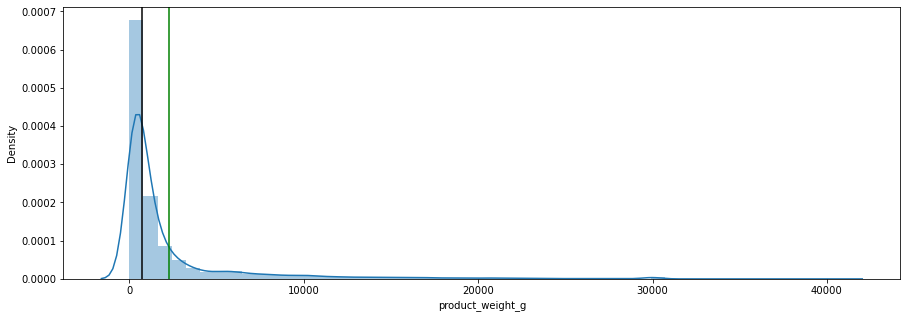

In [41]:
#Visualizing the product_weight_g for skewness

plt.figure(figsize=(15,5))
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(), color="green")
plt.axvline(products.product_weight_g.median(), color="black")
plt.show()

So we can observe that the above graph is skewed.

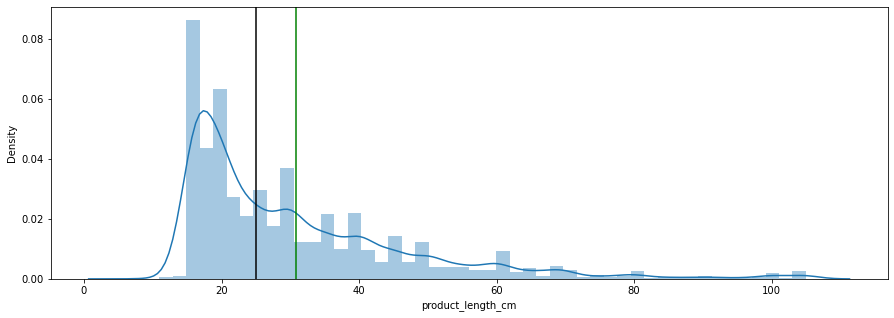

In [42]:
#Visualizing the product_length_cm for skewness

plt.figure(figsize=(15,5))
sns.distplot(products.product_length_cm)
plt.axvline(products.product_length_cm.mean(), color="green")
plt.axvline(products.product_length_cm.median(), color="black")
plt.show()

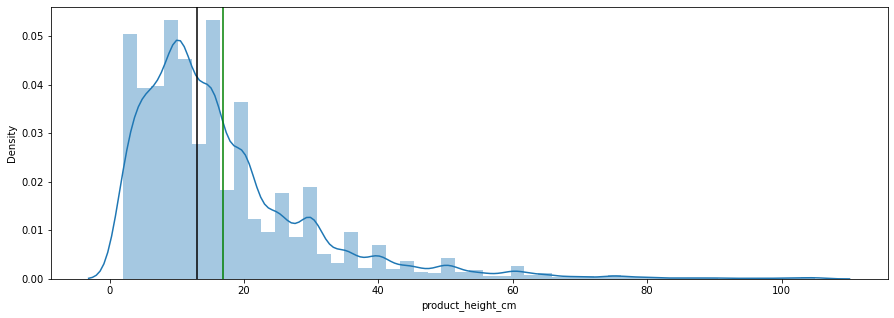

In [43]:
#Visualizing the product_height_cm for skewness

plt.figure(figsize=(15,5))
sns.distplot(products.product_height_cm)
plt.axvline(products.product_height_cm.mean(), color="green")
plt.axvline(products.product_height_cm.median(), color="black")
plt.show()

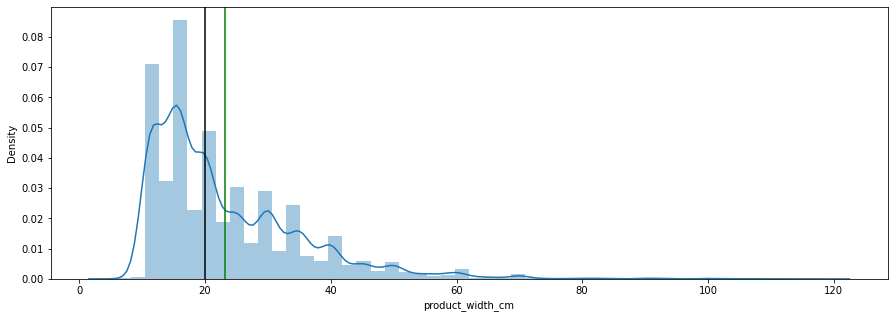

In [44]:
#Visualizing the product_width_cm for skewness

plt.figure(figsize=(15,5))
sns.distplot(products.product_width_cm)
plt.axvline(products.product_width_cm.mean(), color="green")
plt.axvline(products.product_width_cm.median(), color="black")
plt.show()


All the above graphs are skewed so need to replace the missing values of all numerical columns by median values.

In [45]:
products['product_weight_g'].median()


700.0

In [46]:
products['product_length_cm'].median()


25.0

In [48]:
products['product_height_cm'].median()

13.0

In [49]:
products['product_width_cm'].median()

20.0

In [50]:
#Replacing the missing values with Median.
products.product_weight_g.fillna(products.product_weight_g.median(), inplace=True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace=True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace=True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace=True)

In [51]:
#Validating missing values after replacing.

products.isna().sum().sort_values(ascending=False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

1. So now all the basic work is done and we have cleaned all the worksheets which is ready now for visualisations.

2. At first we need to merge all the data sheets in to one excel file and extract it.

## Saving the cleaned excel file by using xlsxwriter as the engine

In [52]:
# Create a Pandas Excel writer using xlsxwriter as the engine.
writer = pd.ExcelWriter('Retail_dataset_Cleaned.xlsx', engine='xlsxwriter')

In [53]:
# Write each dataframe to a different worksheet.
orders.to_excel(writer, sheet_name='Orders')
order_items.to_excel(writer, sheet_name='Orderitems')
customers.to_excel(writer, sheet_name='Customers')
payments.to_excel(writer, sheet_name='Payments')
products.to_excel(writer, sheet_name='Products')

In [54]:
# Close the Pandas Excel writer and output the Excel file.
writer.save()